In [1]:
"""
In annealing the temperature is also increased sometimes. Should we do the same?
Should the temperature in simulated annealing decrease linearly?
Can we not get stuck in a local minimum by changing one parameter at a time? see picture '2dLocalMinima'
"""

"\nIn annealing the temperature is also increased sometimes. Should we do the same?\nShould the temperature in simulated annealing decrease linearly?\nCan we not get stuck in a local minimum by changing one parameter at a time? see picture '2dLocalMinima'\n"

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
// from https://stackoverflow.com/questions/36757301/disable-ipython-notebook-autoscrolling
// disable scroll

<IPython.core.display.Javascript object>

In [3]:
import matplotlib.pyplot as plt
import pandas
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.metrics import mean_squared_error as detMSE

In [4]:
# differential equation for prey
def dx(alfa, x, beta, y):
    dx = alfa * x - beta * x * y
    return dx

# differential equation for predators
def dy(delta, x, y, gamma):
    dy = delta * x * y - gamma * y
    return dy

# solving differential equtions using Euler method
def EulerSolveODE(x,y,parameters, times):
    for month in times:
        xList.append(x)
        yList.append(y)    
        x += dx(parameters[0], x, parameters[1], y)
        y += dy(parameters[2], x, y, parameters[3]) 

# randomly change one of the parameters 
# all change at equal probability
# the parameter is changed to a completely new number in the range
def changeParameter(parameters):
    randomNumber = np.random.random()
    if randomNumber < 1./4:
        parameters[0] = np.random.random()/10
    elif randomNumber < 2./4:
        parameters[1] = np.random.random()/10
    elif randomNumber < 3./4:
        parameters[2] = np.random.random()/10
    else:
        parameters[3] = np.random.random()/10
    return parameters

In [5]:
# import csv using pandas
# create 3 data lists: time, prey and predators
pandaFile = pandas.read_csv('predator-prey-data.csv')
times = []
xValues = []
yValues = []
for row in range(len(pandaFile['t'])):
    time = pandaFile['t'][row]
    x = pandaFile['x'][row]
    y = pandaFile['y'][row]
    times.append(time)
    xValues.append(x)
    yValues.append(y)

In [6]:
# using Euler
# prey and predators are float numbers

# initial guesses

# set the initial amount of prey and predators equal to those of the real data
x = xValues[0] #amount of prey
y = yValues[0] #amount of predators

# assign a random number to the parameters in the range
alfa = np.random.random()/10 #birth rate prey
beta = np.random.random()/10 #prey catch rate
delta = np.random.random()/10 #birth of predators per predator per prey
gamma = np.random.random()/10 #death rate predators
establishedParameters = [alfa,beta,delta,gamma]

# assign the cooling schedule
TMax = 10000
TMin = 1
temperatures = np.arange(TMax,TMin-1,-1)

# assign a high number to the mean squared error 
#hoping the first random guess of the parameters will lead to acceptance
mse = 999999999

# simulating annealing
for T in temperatures:
    
    # set newParameters almost equal to establisedParameters
    # changing only 1 using the function changeParameter
    newParameters = changeParameter(establishedParameters)
    
    # calculate the amount of prey and predators for each time point indicated from data
    # assume all time point lie at equal distance
    xList = []
    yList = []
    EulerSolveODE(x,y,newParameters, times)
    
    #determine mse of prey and predators
    msePrey = detMSE(xValues,xList)
    msePredators = detMSE(yValues,yList)
    mseSum = msePrey + msePredators
    
    # if the new mean squared error is smaller than the old, 
    # accept newParameters as establisedParameters
    # take the lower mean squared error as the new benchmark
    if mseSum < mse:
        establishedParameters = newParameters
        mse = mseSum
        
    # if the new mean squared error is almost as small as the old,
    # accept newParameters as establisedParameters 
    # take the lower mean squared error as the new benchmark
    elif (mseSum - mse)/T < np.random.random():
        establishedParameters = newParameters
        mse = mseSum  
        
print establishedParameters

[0.014750707394978847, 0.09522624128976445, 0.015993120201343403, 0.09582273111931591]


In [7]:
# determine the mean squared error
print detMSE(xValues,xList) + detMSE(yValues,yList)

9.615625326565805


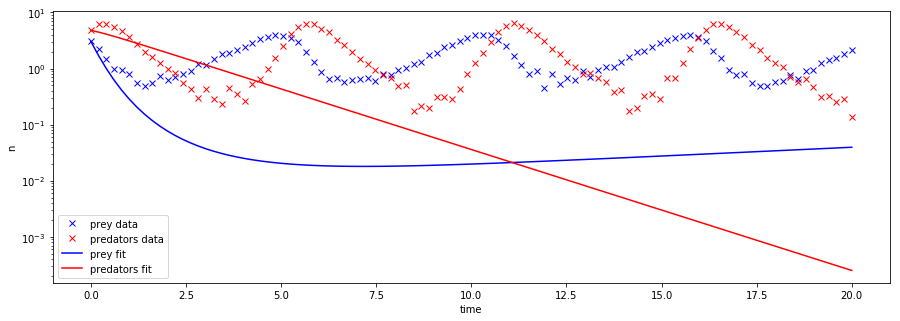

In [8]:
#print 'xList =', xList
#print 'yList =', yList
plt.figure(figsize=(15,5))
plt.plot(times,xValues,'x', label = 'prey data', color = 'b')
plt.plot(times,yValues,'x', label = 'predators data', color = 'r')
plt.plot(times,xList,label = 'prey fit', color = 'b')
plt.plot(times,yList, label = 'predators fit', color = 'r')
plt.yscale("log")
plt.xlabel('time')
plt.ylabel('n')
plt.legend()
plt.show()